# Project

In [14]:
# Initialisation cell
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import SelectFromModel


In [15]:
df = pd.read_csv('features_30_sec.csv')
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [16]:
features = df.drop(['length', 'label'], axis=1)

le = LabelEncoder()
le.fit(df.label)

labels = le.transform(df.label)

le.fit(df.filename)

filenames = le.transform(df.filename)
features.filename = filenames


In [17]:
# Feaure Selection: decreases accuracy

DT_classifier = ExtraTreesClassifier(n_estimators=20)
DT_classifier = DT_classifier.fit(features.drop('filename', axis=1), labels)

model = SelectFromModel(DT_classifier, prefit=True)
important_features = model.transform(features.drop('filename', axis=1))


C:\Users\afrop\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


[]

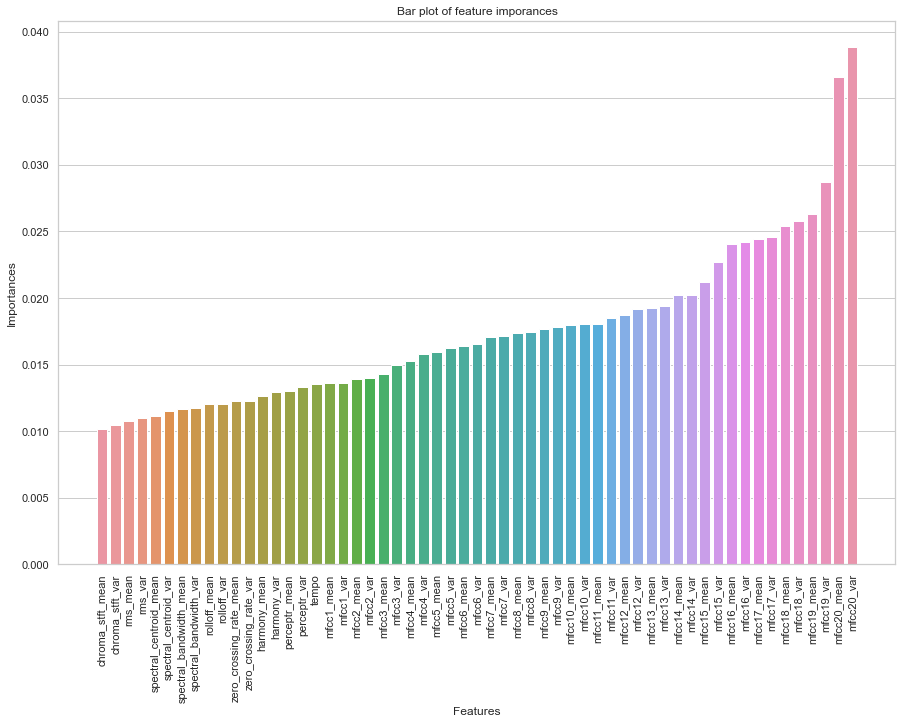

In [18]:
# Feature importances

importances = DT_classifier.feature_importances_
importances.sort()
fig, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation=90)
plt.title("Bar plot of feature imporances")
plt.xlabel("Features")
plt.ylabel("Importances")
sns.set_theme(style="whitegrid")
sns.barplot(ax=ax, x=features.drop('filename', axis=1).columns, y=importances)
plt.plot()


In [19]:
X_train, X_test, y_train, y_test = tts(
    features, labels, test_size=0.2, random_state=1)
test_filenames = X_test.filename

X_train, X_test = X_train.drop(
    'filename', axis=1), X_test.drop('filename', axis=1)

# Feature scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Feature normalization
normalizer = Normalizer().fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)


Logistic accuracy: 0.655
Time to build: 0.4863 seconds


[]

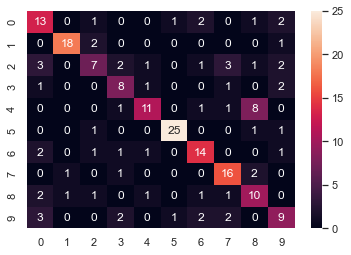

In [20]:
# Logistic regression

logistic_classifier = LogisticRegression()
tic = time.perf_counter()
logistic_classifier.fit(X_train, y_train)
toc = time.perf_counter()
logistic_predictions = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
print(
    f"Logistic accuracy: {logistic_accuracy}\nTime to build: {toc-tic:0.4f} seconds")
sns.heatmap(logistic_confusion_matrix, annot=True)
plt.show()


SVM accuracy: 0.755
Time to build: 0.0537 seconds


[]

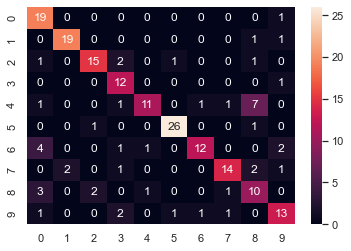

In [21]:
# Support Vector Machines

SVM_classifier = SVC(C=3, max_iter=500)
tic = time.perf_counter()
SVM_classifier.fit(X_train, y_train)
toc = time.perf_counter()
SVM_predictions = SVM_classifier.predict(X_test)
SVM_accuracy = accuracy_score(y_test, SVM_predictions)
SVM_confusion_matrix = confusion_matrix(y_test, SVM_predictions)
print(f"SVM accuracy: {SVM_accuracy}\nTime to build: {toc-tic:0.4f} seconds")
sns.heatmap(SVM_confusion_matrix, annot=True)
plt.show()


MLP accuracy: 0.725
Time to build: 6.9456 seconds


[]

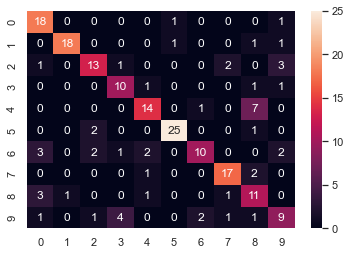

In [22]:
# Multilayer Perceptron

MLP_classifier = MLPClassifier(max_iter=850)
tic = time.perf_counter()
MLP_classifier.fit(X_train, y_train)
toc = time.perf_counter()
MLP_predictions = MLP_classifier.predict(X_test)
MLP_accuracy = accuracy_score(y_test, MLP_predictions)
MLP_confusion_matrix = confusion_matrix(y_test, MLP_predictions)
print(f"MLP accuracy: {MLP_accuracy}\nTime to build: {toc-tic:0.4f} seconds")
sns.heatmap(MLP_confusion_matrix, annot=True)
plt.show()


RF accuracy: 0.67
Time to build: 0.5115 seconds


[]

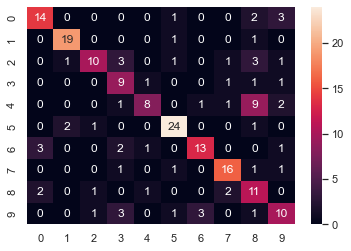

In [23]:
# Random Forests

RF_classifier = RandomForestClassifier(max_depth=100)
tic = time.perf_counter()
RF_classifier.fit(X_train, y_train)
toc = time.perf_counter()
RF_predictions = RF_classifier.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)
RF_confusion_matrix = confusion_matrix(y_test, RF_predictions)
print(f"RF accuracy: {RF_accuracy}\nTime to build: {toc-tic:0.4f} seconds")
sns.heatmap(RF_confusion_matrix, annot=True)
plt.show()


In [24]:
# Create table for genres and associated songs
genre_songs = pd.DataFrame([df.filename[test_filenames].values, df.filename[test_filenames], df.filename[test_filenames], df.filename[test_filenames], df.filename[test_filenames],
                           df.filename[test_filenames], df.filename[test_filenames], df.filename[test_filenames], df.filename[test_filenames], df.filename[test_filenames]])
genre_songs.index = range(10)
genre_songs

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
1,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
2,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
3,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
4,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
5,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
6,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
7,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
8,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav
9,jazz.00007.wav,reggae.00018.wav,hiphop.00052.wav,disco.00068.wav,country.00042.wav,rock.00029.wav,country.00062.wav,reggae.00010.wav,disco.00018.wav,blues.00049.wav,...,metal.00099.wav,reggae.00026.wav,country.00033.wav,jazz.00084.wav,rock.00074.wav,hiphop.00030.wav,reggae.00074.wav,jazz.00050.wav,metal.00008.wav,country.00007.wav


In [32]:
# Q-learning Recommendation

# Q-table Initialization
iterations = 200000
q_table = np.empty((10, 200), dtype=float)

for i in range(10):
    for j in range(200):
        if SVM_predictions[j] == i:
            q_table[i,j] = 0.01
        else:
            q_table[i,j] = -0.01
    
cum_rewards = []

# Hyperparameters
alpha = 0.1
epsilon = 1.0
decrease = 0.0001

genres = ['blues', 'classical', 'country', 'disco',
          'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

epochs = 0
cum_reward = 0

tic = time.perf_counter()

for i in range(1,iterations+1):

    for state in range(10):

        if np.random.rand(1) < epsilon:
            choice = np.random.choice(q_table[state,:])
            action = np.where(q_table[state]==choice)
        else:
            action = np.argmax(q_table[state])
            
        recommendation = genre_songs.loc[state, action]
    
        if genres[state] in recommendation:
            response = 1
        else:
            response = 0

        if response == 1:
            reward = 1
        else:
            reward = -1

        cum_reward += reward

    

        current_q_value = q_table[state, action]

        new_q_value = current_q_value + alpha*reward
        q_table[state, action] = new_q_value

        if i % 100 == 0:
            if epsilon > decrease:
                epsilon -= decrease
            if alpha > decrease:
                alpha -= decrease

    epochs += 1
    cum_rewards.append(cum_reward)
       
toc = time.perf_counter()

print(f"Training finished in: {toc-tic:0.4f} seconds\n")


Training finished in: 756.4128 seconds



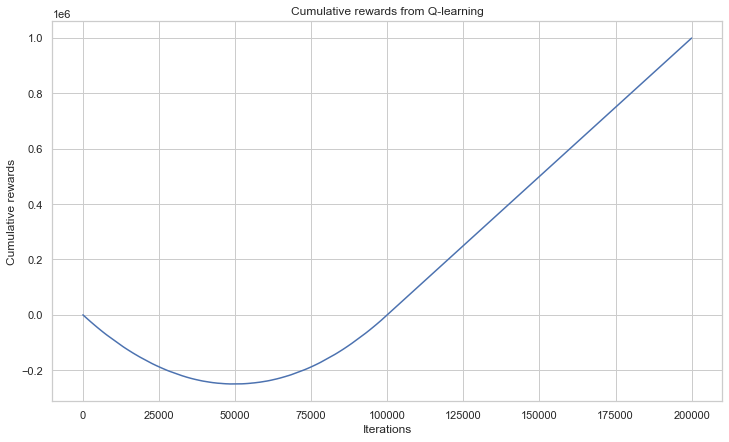

In [33]:
plt.figure(figsize=(12, 7))
plt.title('Cumulative rewards from Q-learning')
plt.xlabel('Iterations')
plt.ylabel('Cumulative rewards')
sns.lineplot(x=range(len(cum_rewards)), y=cum_rewards)
plt.show()

QL accuracy: 0.755


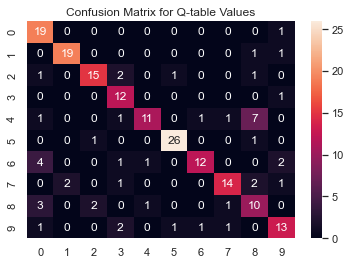

In [34]:
QL_predictions = pd.DataFrame(q_table).idxmax().values
QL_accuracy = accuracy_score(y_test, QL_predictions)
QL_confusion_matrix = confusion_matrix(y_test, QL_predictions)
print(f"QL accuracy: {QL_accuracy}")
plt.title("Confusion Matrix for Q-table Values")
sns.heatmap(QL_confusion_matrix, annot=True)
plt.show()